In [6]:
import pandas as pd
tweet_Biden = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Biden.csv"), index_col=0)

In [8]:
tweet_Biden.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330752855066763264,2020-11-23 05:59:39,"whitehouse how about u post a plan cv , don...",0.250000,Positive
1,1330752854072692736,2020-11-23 05:59:39,biden and harris will have a hard time getting...,0.254167,Positive
2,1330752853913128960,2020-11-23 05:59:39,joenbc jonlemire with not a shred of evidenc...,0.000000,Neutral
3,1330752851543470081,2020-11-23 05:59:38,blinken was a key adviser to biden when the s...,0.000000,Neutral
4,1330752850889203719,2020-11-23 05:59:38,snl got jim carrey to okay biden because he is...,-0.150000,Negative


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words("english")

print((tweet_Biden['full_text']).head())
print('-------Remove Stop Word------')
tweet_Biden['StopWords'] = tweet_Biden['full_text'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print((tweet_Biden['StopWords']).head())


0     whitehouse how about u post a plan   cv , don...
1    biden and harris will have a hard time getting...
2     joenbc  jonlemire with not a shred of evidenc...
3     blinken was a key adviser to biden when the s...
4    snl got jim carrey to okay biden because he is...
Name: full_text, dtype: object
-------Remove Stop Word------
0    whitehouse u post plan cv , donald's exit plan...
1    biden harris hard time getting things done dem...
2    joenbc jonlemire shred evidence back statement...
3    blinken key adviser biden senator voted author...
4          snl got jim carrey okay biden also retarded
Name: StopWords, dtype: object


In [12]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print((tweet_Biden['StopWords']).head())
print('-------Stemming------')
tweet_Biden['Stemming'] = tweet_Biden['StopWords'].astype(str).apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print((tweet_Biden['Stemming']).head())

0    whitehouse u post plan cv , donald's exit plan...
1    biden harris hard time getting things done dem...
2    joenbc jonlemire shred evidence back statement...
3    blinken key adviser biden senator voted author...
4          snl got jim carrey okay biden also retarded
Name: StopWords, dtype: object
-------Stemming------
0    whitehous u post plan cv , donald' exit plan, ...
1    biden harri hard time get thing done dem win s...
2    joenbc jonlemir shred evid back statements, tw...
3    blinken key advis biden senat vote author use ...
4            snl got jim carrey okay biden also retard
Name: Stemming, dtype: object


In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print((tweet_Biden['Stemming']).head())
print('-------Lemmazation------')
tweet_Biden['Lemmatizing'] = tweet_Biden['Stemming'].astype(str).apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print((tweet_Biden['Lemmatizing']).head())

0    whitehous u post plan cv , donald' exit plan, ...
1    biden harri hard time get thing done dem win s...
2    joenbc jonlemir shred evid back statements, tw...
3    blinken key advis biden senat vote author use ...
4            snl got jim carrey okay biden also retard
Name: Stemming, dtype: object
-------Lemmazation------
0    whitehous u post plan cv , donald' exit plan, ...
1    biden harri hard time get thing done dem win s...
2    joenbc jonlemir shred evid back statements, tw...
3    blinken key advis biden senat vote author use ...
4            snl got jim carrey okay biden also retard
Name: Lemmatizing, dtype: object


In [14]:
from textblob import TextBlob
text = tweet_Biden["Lemmatizing"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    tweet_Biden.at[i, 'Sentiment'] = sentiment
    if sentiment <0.00:
        SentimentClass = 'Negative'
        tweet_Biden.at[i, 'SentimentClass'] = SentimentClass 
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        tweet_Biden.at[i, 'SentimentClass'] = SentimentClass 
    else:
        SentimentClass = 'Neutral'
        tweet_Biden.at[i, 'SentimentClass'] = SentimentClass 

In [15]:
tweet = tweet_Biden.to_csv("/Users/bahtinur/Desktop/Tweet/Biden.csv")

In [59]:
import pandas as pd

tweet_Biden = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Biden.csv"), index_col=0)

In [60]:
tweet_Biden.drop(['StopWords', 'Stemming', 'full_text'], axis=1, inplace = True)

tweet_Biden.head()

,id,created_at,Sentiment,SentimentClass,Lemmatizing
0,1330752855066763264,2020-11-23 05:59:39,0.000000,Neutral,"whitehous u post plan cv , donald' exit plan, ..."
1,1330752854072692736,2020-11-23 05:59:39,0.254167,Positive,biden harri hard time get thing done dem win s...
2,1330752853913128960,2020-11-23 05:59:39,-0.083333,Negative,"joenbc jonlemir shred evid back statements, tw..."
3,1330752851543470081,2020-11-23 05:59:38,0.000000,Neutral,blinken key advis biden senat vote author use ...
4,1330752850889203719,2020-11-23 05:59:38,-0.200000,Negative,snl got jim carrey okay biden also retard


In [61]:
tweet_Biden.rename(columns={'Lemmatizing':'text'}, inplace=True)
tweet_Biden.head()

,id,created_at,Sentiment,SentimentClass,text
0,1330752855066763264,2020-11-23 05:59:39,0.000000,Neutral,"whitehous u post plan cv , donald' exit plan, ..."
1,1330752854072692736,2020-11-23 05:59:39,0.254167,Positive,biden harri hard time get thing done dem win s...
2,1330752853913128960,2020-11-23 05:59:39,-0.083333,Negative,"joenbc jonlemir shred evid back statements, tw..."
3,1330752851543470081,2020-11-23 05:59:38,0.000000,Neutral,blinken key advis biden senat vote author use ...
4,1330752850889203719,2020-11-23 05:59:38,-0.200000,Negative,snl got jim carrey okay biden also retard


In [62]:
sent = {'Positive':'1','Negative':'2','Neutral':'0'}
tweet_Biden['SentimentClass'] = tweet_Biden['SentimentClass'].map(sent)

In [63]:
tweet_Biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862 entries, 0 to 4861
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4862 non-null   int64  
 1   created_at      4862 non-null   object 
 2   Sentiment       4862 non-null   float64
 3   SentimentClass  4862 non-null   object 
 4   text            4861 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 227.9+ KB


In [64]:
tweet_Biden[tweet_Biden.isna().any(axis=1)]
tweet_Biden = tweet_Biden.dropna(how='any')

In [65]:
tweet_Biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4861 entries, 0 to 4861
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4861 non-null   int64  
 1   created_at      4861 non-null   object 
 2   Sentiment       4861 non-null   float64
 3   SentimentClass  4861 non-null   object 
 4   text            4861 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 227.9+ KB


In [82]:
sent = {'1':'Positive','2':'Negative','0':'Neutral'}
tweet_Biden['SentimentClass'] = tweet_Biden['SentimentClass'].map(sent)
tweet_Biden['SentimentClass'].value_counts()

Neutral     2444
Positive    1667
Negative     750
Name: SentimentClass, dtype: int64

<AxesSubplot:>

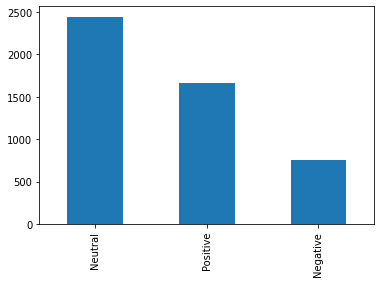

In [83]:
import matplotlib.pyplot as plt
tweet_Biden['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [67]:
X = tweet_Biden.iloc[:, 4].values
y = tweet_Biden.iloc[:, 3].values

In [68]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=250, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(X).toarray()

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [70]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4861, 250), (4861,), (4374, 250), (4374,), (487, 250), (487,))

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_predRF = rfc.predict(X_test)
score_RF = rfc.score(X_test, y_test)
print(confusion_matrix(y_test,y_predRF))
print(classification_report(y_test,y_predRF))
print(accuracy_score(y_test, y_predRF))
print('The accuracy of the Random Forest model is', score_RF)

[[246   4   3]
 [ 39 119   3]
 [ 38   7  28]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       253
           1       0.92      0.74      0.82       161
           2       0.82      0.38      0.52        73

    accuracy                           0.81       487
   macro avg       0.83      0.70      0.73       487
weighted avg       0.82      0.81      0.79       487

0.8069815195071869
The accuracy of the Random Forest model is 0.8069815195071869


In [78]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predSVC = svclassifier.predict(X_test)
score_SVC = svclassifier.score(X_test, y_test)
print(confusion_matrix(y_test,y_predSVC))
print(classification_report(y_test,y_predSVC))
print(accuracy_score(y_test, y_predSVC))
print('The accuracy of the Support Vector Machine model is', score_SVC)

[[251   2   0]
 [ 46 112   3]
 [ 40   8  25]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       253
           1       0.92      0.70      0.79       161
           2       0.89      0.34      0.50        73

    accuracy                           0.80       487
   macro avg       0.85      0.68      0.71       487
weighted avg       0.82      0.80      0.78       487

0.7967145790554415
The accuracy of the Support Vector Machine model is 0.7967145790554415


In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predNB = NB_model.predict(X_test)
score_NB = NB_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predNB))
print(classification_report(y_test,y_predNB))
print(accuracy_score(y_test, y_predNB))
print('The accuracy of the MultinomialNB model is', score_NB)

[[246   7   0]
 [ 51 109   1]
 [ 41  12  20]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       253
           1       0.85      0.68      0.75       161
           2       0.95      0.27      0.43        73

    accuracy                           0.77       487
   macro avg       0.84      0.64      0.67       487
weighted avg       0.80      0.77      0.75       487

0.7700205338809035
The accuracy of the MultinomialNB model is 0.7700205338809035


In [80]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predLR = LR_model.predict(X_test)
score_LR = LR_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predLR))
print(classification_report(y_test,y_predLR))
print(accuracy_score(y_test, y_predLR))
print('The accuracy of the Logistic Regression model is', score_LR)

[[248   4   1]
 [ 47 112   2]
 [ 39   8  26]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       253
           1       0.90      0.70      0.79       161
           2       0.90      0.36      0.51        73

    accuracy                           0.79       487
   macro avg       0.85      0.68      0.71       487
weighted avg       0.82      0.79      0.78       487

0.7926078028747433
The accuracy of the Logistic Regression model is 0.7926078028747433


In [81]:
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
model_KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_test)
score_KNN = model_KNN.score(X_test,y_test)

print(confusion_matrix(y_test,y_predKNN))
print(classification_report(y_test,y_predKNN))
print(accuracy_score(y_test, y_predKNN))
print('The accuracy of the KNN model is', score_KNN)

[[212  29  12]
 [ 76  83   2]
 [ 45  16  12]]
              precision    recall  f1-score   support

           0       0.64      0.84      0.72       253
           1       0.65      0.52      0.57       161
           2       0.46      0.16      0.24        73

    accuracy                           0.63       487
   macro avg       0.58      0.51      0.51       487
weighted avg       0.61      0.63      0.60       487

0.6303901437371663
The accuracy of the KNN model is 0.6303901437371663


In [76]:
from texttable import Texttable
# texttable takes the first reocrd in the list as the column names
# of the table
l = [["CLASSIFICATION", "ACCURACY"],['LogisticRegression', score_LR],['RandomForest', score_RF],['K-NearestNeighbors',score_KNN],['MultinominalNaiveBayes',score_NB], ['SupportVector', score_SVC]]
table = Texttable()
table.add_rows(l)
print(table.draw())

+------------------------+----------+
|     CLASSIFICATION     | ACCURACY |
+========================+==========+
| LogisticRegression     | 0.793    |
+------------------------+----------+
| RandomForest           | 0.807    |
+------------------------+----------+
| K-NearestNeighbors     | 0.630    |
+------------------------+----------+
| MultinominalNaiveBayes | 0.770    |
+------------------------+----------+
| SupportVector          | 0.797    |
+------------------------+----------+
